# Grover's algorithm for two-qubits

Assuming you have a list of 4 characters where waldo is the fourth element in the list, implement Grover’s algorithm to find waldo. If waldo is found in state number 4 then we should get state 11 as our measurement.

 
The oracle matrix that is needed to implement is given by:

$$
oracle =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$

therefore, the oracle will be  the controlled-Z gate.

In [13]:
######initialization
import qiskit as q  # importing Qiskit
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram # import histogram
import matplotlib.pyplot as plt
import numpy as np







Initalize by applying H gates to both input qubits. The function takes the quantum circuit as the input.

In [14]:
def initalize(qc):
    
    qc.h(0)
    qc.h(1)
   

Create circuit

In [15]:
grover_circuit = q.QuantumCircuit(2)
initalize(grover_circuit)



Applying the oracle and Grover's diffusion operator. The 11 in oracle_11 implies that this is the oracle we want to implement if waldo is in the fourth state position 

In [16]:
def oracle_11(qc):
    
    qc.cz(0, 1) #Apply a controlled Z-gate
    

In [17]:
oracle_11(grover_circuit)


Implement the operator as a function u, which takes the quantum circuit as an input and applies the diffusion operator that is a 4x4 matrix with a scalar of 1/2 outside the matrix and all elements inside being 1 and the diagonal elements having a negative sign.

In [18]:
def u(qc): # diffusion operator 
    
    qc.h(0)
    qc.h(1)
    qc.z(0)
    qc.z(1)
    qc.cz(0,1)
    qc.h(0)
    qc.h(1)
  

In [19]:
u(grover_circuit)        


 The function `measure_all()` is used to directly add classical bits and measurements to our circuit.

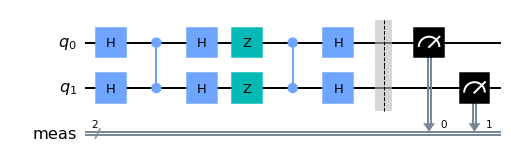

In [20]:
grover_circuit.measure_all()
grover_circuit.draw('mpl')

Implementing the circuit on the qasm simulator

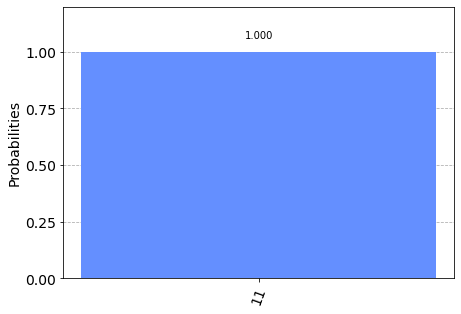

In [21]:
backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(grover_circuit, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)